In [28]:
# standard imports
from IPython.display import display, HTML, Markdown
from datetime import date
import random 
from imp import reload
#import warnings
#warnings.simplefilter("ignore")

# data analytics imports
import pandas as pd
import numpy as np

# graphics
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('seaborn')
plt.rcParams["figure.figsize"] = (16, 8)


# my own code
import road_accidents.road_accidents as ra
import road_accidents.bplot as bplot

# Load data and preprocess it

In [32]:
dfs = []
for file in [#'../data/road_data_accidents_2017.csv', 
             #'../data/road_data_accidents_2018.csv',
             '../data/road_data_accidents_2019.csv']:
    df  = pd.read_csv(file, low_memory=False)
    dfs.append(df)
df_raw = pd.concat(dfs)

print (f'Number of entries= {len(df_input)}')

Number of entries= 117536


# First look at the data

In [34]:
reload(ra);
reload(bplot);

In [8]:
for x in ['Police_Force', 
          'Local_Authority_(District)', 
          'Local_Authority_(Highway)'
         ]:
    n_values = len(df_input[x].value_counts())
    print (f'### {x:30} has {n_values:3} unique values')


### Police_Force                   has  51 unique values
### Local_Authority_(District)     has 380 unique values
### Local_Authority_(Highway)      has 207 unique values


In [33]:
pd.to_datetime(df_raw['Date']).min()

Timestamp('2019-01-01 00:00:00')

In [49]:
df_input = ra.pre_processing(df_raw)

In [36]:
df_input.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 117536 entries, 0 to 117535
Data columns (total 21 columns):
 #   Column                                   Non-Null Count   Dtype  
---  ------                                   --------------   -----  
 0   Accident_Severity                        117536 non-null  int64  
 1   Number_of_Vehicles                       117536 non-null  int64  
 2   Number_of_Casualties                     117536 non-null  int64  
 3   Day_of_Week                              117536 non-null  int64  
 4   1st_Road_Class                           117536 non-null  int64  
 5   Road_Type                                117536 non-null  int64  
 6   Speed_limit                              117536 non-null  int64  
 7   Junction_Detail                          117536 non-null  int64  
 8   Junction_Control                         117536 non-null  int64  
 9   2nd_Road_Class                           117536 non-null  int64  
 10  Pedestrian_Crossing-Human_Contro

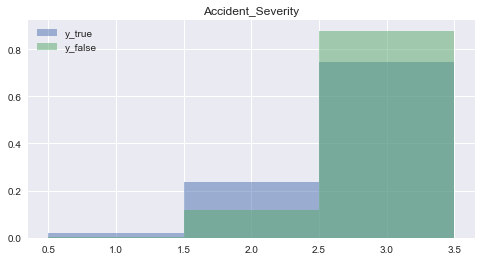

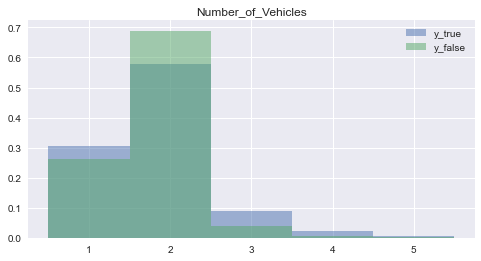

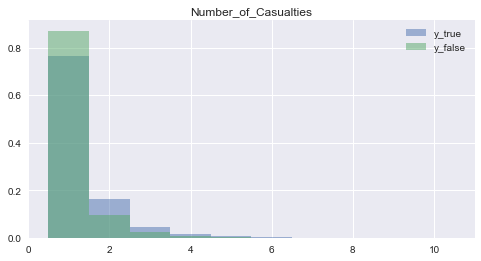

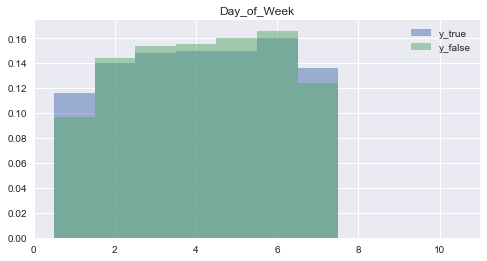

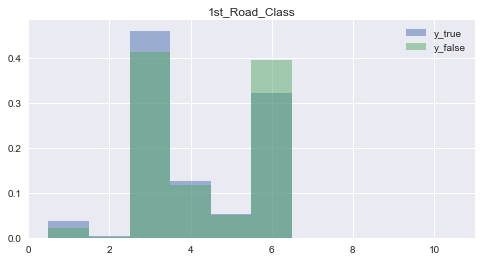

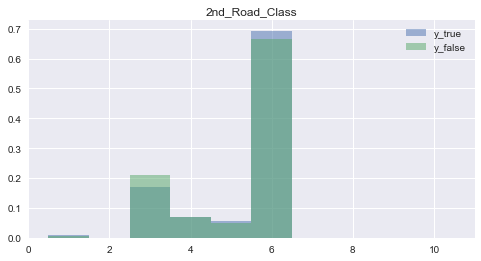

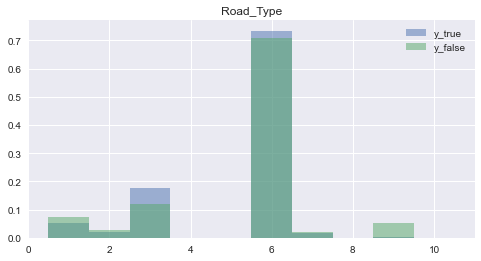

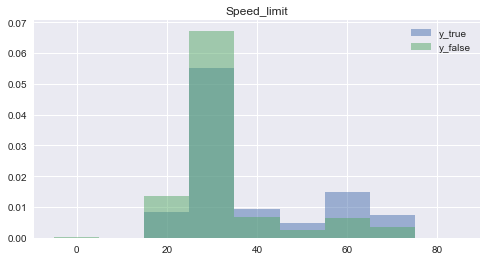

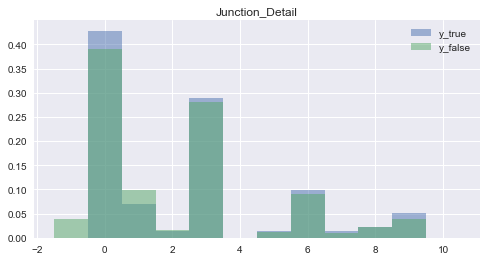

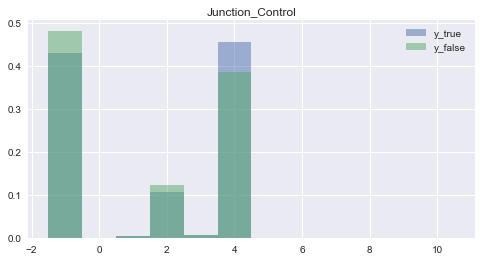

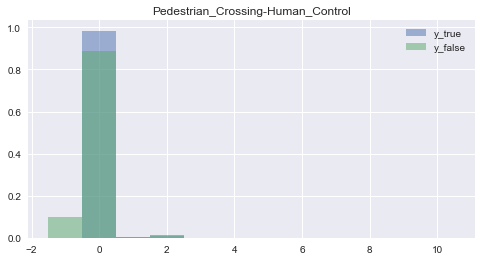

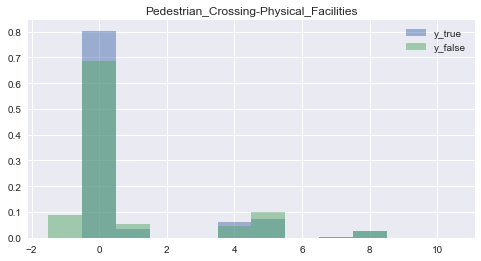

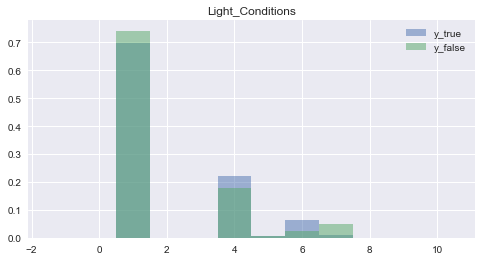

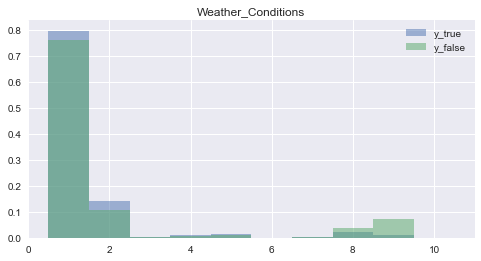

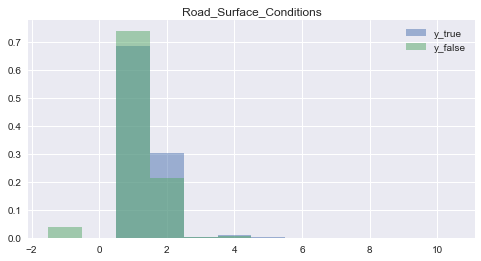

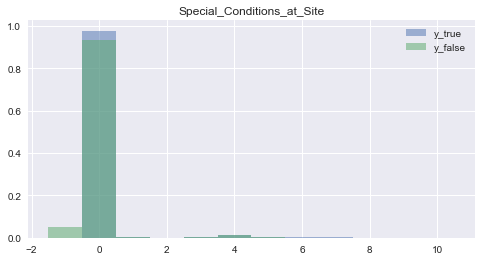

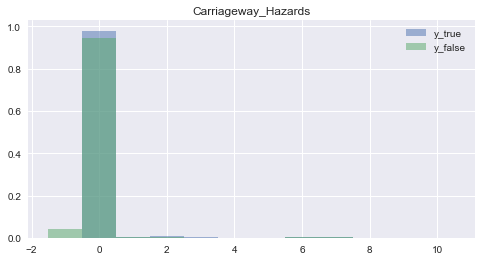

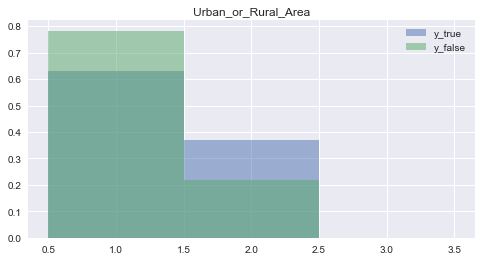

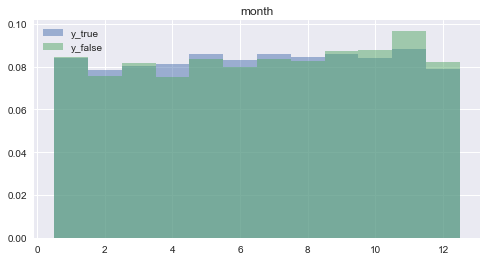

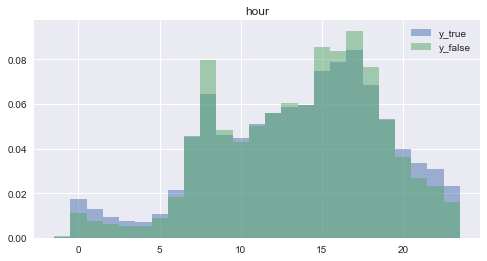

In [11]:
ra.single_variables_plots(df_input)

# Modeling

In [52]:
reload(ra);

#### ROC curve:

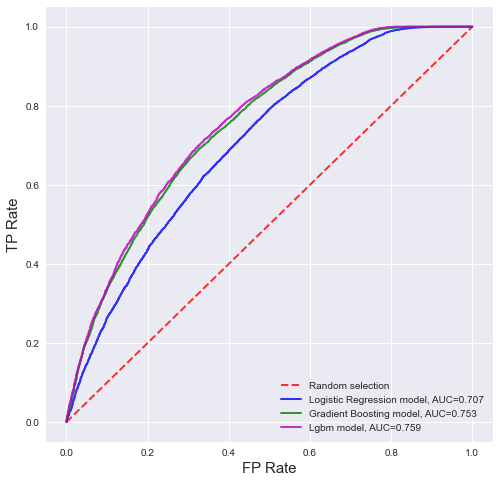

#### Features importance:

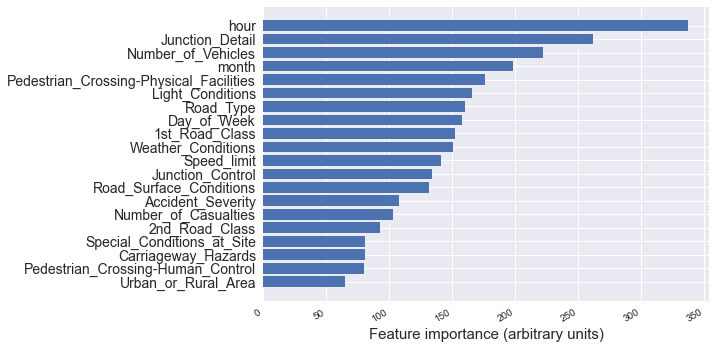

In [53]:
models, x_train, y_train, x_test, y_test = ra.do_all(df_input)

# Adding high-cardinality variables?

In [59]:
reload(ra);

In [55]:
df_input = ra.pre_processing(df_raw, keep_police_force=True)

In [56]:
y_true  = df_input[df_input['y']==1]
y_false = df_input[df_input['y']==0]

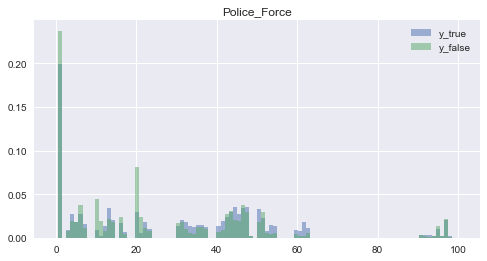

In [57]:
ra.plot_one_var_vs_y('Police_Force', y_true, y_false, np.linspace(-0.5,100.5,101))

#### ROC curve:

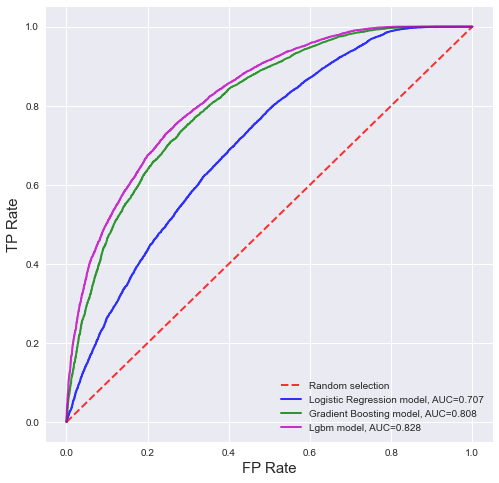

#### List of working points for model Lgbm:

churn prob threshold,false positive rate [%],true positive rate [%]
0.835,10.0,50.3
0.754,20.0,67.5
0.678,30.0,78.0
0.603,40.0,85.7


#### Features importance:

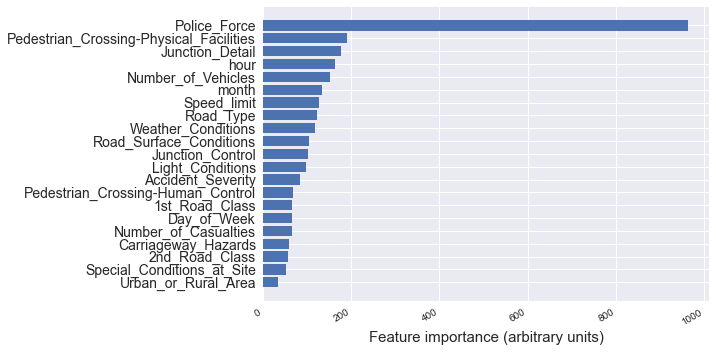

In [60]:
models, x_train, y_train, x_test, y_test = ra.do_all(df_input)